# Analise sobre o racismo ambiental na baixada fluminense

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from zipfile import ZipFile
import seaborn as sn

### Analise de dados sobre queimadas 

In [2]:
pasta = "C:\\Users\\wesle\\Downloads\\"
focos_abertos = os.path.join(pasta,'Focos_BDQueimadas.zip')

In [3]:
with ZipFile(focos_abertos) as z:
    with z.open(f'Focos_2022-01-01_2022-12-11.csv') as f:
        focos_queimadas = pd.read_csv(f,sep=',', encoding = 'utf-8')

In [4]:
focos_queimadas.head(1)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2022/04/13 15:44:00,NOAA-20,Brasil,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES,Mata Atlantica,2.0,2.6,0.3,-21.89052,-41.1526,2.8


In [5]:
focos_queimadas.dropna(subset = "riscofogo",inplace = True)
focos_queimadas.drop(["satelite"], axis = 1, inplace = True)

In [6]:
focos_queimadas['datahora'] = pd.to_datetime(focos_queimadas['datahora'], errors='coerce')

focos_queimadas['data'] = focos_queimadas['datahora'].dt.strftime('%d-%m-%Y')
focos_queimadas['hora'] = focos_queimadas['datahora'].dt.strftime('%H:%M:%S')

In [7]:
focos_queimadas['mês']= focos_queimadas['datahora'].dt.month

focos_queimadas['data'] = pd.to_datetime(focos_queimadas['data'], errors='coerce')

D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

In [8]:
focos_queimadas.drop(["datahora"], axis = 1, inplace = True)

In [9]:
focos_queimadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 10813
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pais          10496 non-null  object        
 1   estado        10496 non-null  object        
 2   municipio     10496 non-null  object        
 3   bioma         10496 non-null  object        
 4   diasemchuva   10496 non-null  float64       
 5   precipitacao  10496 non-null  float64       
 6   riscofogo     10496 non-null  float64       
 7   latitude      10496 non-null  float64       
 8   longitude     10496 non-null  float64       
 9   frp           9826 non-null   float64       
 10  data          10496 non-null  datetime64[ns]
 11  hora          10496 non-null  object        
 12  mês           10496 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [10]:
# Mínimo, abaixo de 0,15; 
# "Baixo", de 0,15 a 0,4; 
# Médio, de 0,4 a 0,7; 
# Alto, de 0,7 a 0,95 e; 
# Crítico, acima de 0.95

focos_queimadas['status'] = ""

for i,row in focos_queimadas.iterrows():
    
    if focos_queimadas["riscofogo"][i] < 0.1:
        focos_queimadas['status'][i] = "Mínimo"
        
    if focos_queimadas["riscofogo"][i] >= 0.9:
        focos_queimadas['status'][i] = "Crítico"
    
    elif focos_queimadas["riscofogo"][i] >= 0.1 and focos_queimadas["riscofogo"][i] < 0.4:
        focos_queimadas['status'][i] = "Baixo"
    
    elif focos_queimadas["riscofogo"][i] >= 0.4 and focos_queimadas["riscofogo"][i] < 0.7:
        focos_queimadas['status'][i] = "Médio"
    
    elif focos_queimadas["riscofogo"][i] >= 0.7 and focos_queimadas["riscofogo"][i] < 0.9:
        focos_queimadas['status'][i] = "Alto"
        

C:\Users\wesle\AppData\Local\Temp\ipykernel_9652\3694831648.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focos_queimadas['status'][i] = "Baixo"
C:\Users\wesle\AppData\Local\Temp\ipykernel_9652\3694831648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focos_queimadas['status'][i] = "Crítico"
C:\Users\wesle\AppData\Local\Temp\ipykernel_9652\3694831648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focos_queimadas['sta

In [11]:
focos_queimadas.head(1)

,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora,mês,status
0,Brasil,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES,Mata Atlantica,2.0,2.6,0.3,-21.89052,-41.1526,2.8,2022-04-13,15:44:00,4,Baixo


In [12]:
df_condicao = focos_queimadas[focos_queimadas["riscofogo"] == -999.0]

focos_queimadas.drop(df_condicao.index, inplace = True)

In [13]:
dados_queimadas_bxd = focos_queimadas.loc[(focos_queimadas["municipio"] == "GUAPIMIRIM") | (focos_queimadas["municipio"] == "MAGE") | (focos_queimadas["municipio"] == "DUQUE DE CAXIAS") | (focos_queimadas["municipio"] == "NOVA IGUACU") | (focos_queimadas["municipio"] == "SAO JOAO DE MERITI") | (focos_queimadas["municipio"] == "MESQUITA") | (focos_queimadas["municipio"] == "NILOPOLIS") | (focos_queimadas["municipio"] == "BELFORD ROXO") | (focos_queimadas["municipio"] == "QUEIMADOS") | (focos_queimadas["municipio"] == "JAPERI") | (focos_queimadas["municipio"] == "PARACAMBI") | (focos_queimadas["municipio"] == "SEROPEDICA") | (focos_queimadas["municipio"] == "ITAGUAI")].sort_values('municipio')

dados_queimadas_RJ = focos_queimadas.loc[(focos_queimadas["municipio"] == "RIO DE JANEIRO")]

In [14]:
dados_queimadas_bxd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 7181 to 3372
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pais          1009 non-null   object        
 1   estado        1009 non-null   object        
 2   municipio     1009 non-null   object        
 3   bioma         1009 non-null   object        
 4   diasemchuva   1009 non-null   float64       
 5   precipitacao  1009 non-null   float64       
 6   riscofogo     1009 non-null   float64       
 7   latitude      1009 non-null   float64       
 8   longitude     1009 non-null   float64       
 9   frp           974 non-null    float64       
 10  data          1009 non-null   datetime64[ns]
 11  hora          1009 non-null   object        
 12  mês           1009 non-null   int64         
 13  status        1009 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 118.2+ KB


In [25]:
indices_municipios_bxd = dados_queimadas_bxd.groupby(["status", 'municipio']).agg({
    'municipio':'first',
    'status':'count', 
    'bioma':'first',
    'riscofogo':'first',
    'precipitacao':'first',
    'diasemchuva':'first',
    'diasemchuva':'first',
    'data':'first',
    'mês': 'first' }).sort_values(by=['riscofogo'],ascending=False)

In [26]:
indices_municipios_bxd

municipio  status           bioma  riscofogo  \
status  municipio                                                             
Crítico ITAGUAI                  ITAGUAI     110  Mata Atlantica       1.00   
        QUEIMADOS              QUEIMADOS      36  Mata Atlantica       1.00   
        DUQUE DE CAXIAS  DUQUE DE CAXIAS      18  Mata Atlantica       1.00   
        NILOPOLIS              NILOPOLIS      10  Mata Atlantica       1.00   
        NOVA IGUACU          NOVA IGUACU      87  Mata Atlantica       1.00   
        SEROPEDICA            SEROPEDICA     368  Mata Atlantica       1.00   
        JAPERI                    JAPERI      39  Mata Atlantica       0.99   
        PARACAMBI              PARACAMBI     104  Mata Atlantica       0.99   
        MESQUITA                MESQUITA      10  Mata Atlantica       0.95   
        MAGE                        MAGE       6  Mata Atlantica       0.94   
        GUAPIMIRIM            GUAPIMIRIM      17  Mata Atlantica       0.93   
Alto    NOVA IGUACU          NOVA IGUACU      17  Mata Atlantica       0.87   
        MAGE                        MAGE       3  Mata Atlantica       0.84   
        ITAGUAI                  ITAGUAI      22  Mata Atlantica       0.84   
        PARACAMBI              PARACAMBI      18  Mata Atlantica       0.83   
        MESQUITA                MESQUITA       4  Mata Atlantica       0.82   
        JAPERI                    JAPERI       3  Mata Atlantica       0.82   
        SEROPEDICA            SEROPEDICA      36  Mata Atlantica       0.80   
        GUAPIMIRIM            GUAPIMIRIM       4  Mata Atlantica       0.78   
        DUQUE DE CAXIAS  DUQUE DE CAXIAS       3  Mata Atlantica       0.70   
        QUEIMADOS              QUEIMADOS       1  Mata Atlantica       0.70   
Médio   NOVA IGUACU          NOVA IGUACU       4  Mata Atlantica       0.68   
        DUQUE DE CAXIAS  DUQUE DE CAXIAS       1  Mata Atlantica       0.61   
        PARACAMBI              PARACAMBI       7  Mata Atlantica       0.52   
        GUAPIMIRIM            GUAPIMIRIM       6  Mata Atlantica       0.50   
        ITAGUAI                  ITAGUAI      10  Mata Atlantica       0.50   
        MESQUITA                MESQUITA       1  Mata Atlantica       0.50   
        SEROPEDICA            SEROPEDICA      16  Mata Atlantica       0.40   
Baixo   DUQUE DE CAXIAS  DUQUE DE CAXIAS       8  Mata Atlantica       0.31   
        NOVA IGUACU          NOVA IGUACU       1  Mata Atlantica       0.31   
        SEROPEDICA            SEROPEDICA       9  Mata Atlantica       0.30   
        GUAPIMIRIM            GUAPIMIRIM       2  Mata Atlantica       0.20   
        ITAGUAI                  ITAGUAI       5  Mata Atlantica       0.20   
        MAGE                        MAGE       1  Mata Atlantica       0.20   
        JAPERI                    JAPERI       3  Mata Atlantica       0.10   
Mínimo  DUQUE DE CAXIAS  DUQUE DE CAXIAS      16  Mata Atlantica       0.00   
        NOVA IGUACU          NOVA IGUACU       1  Mata Atlantica       0.00   
        PARACAMBI              PARACAMBI       1  Mata Atlantica       0.00   
        SEROPEDICA            SEROPEDICA       1  Mata Atlantica       0.00   

                         precipitacao  diasemchuva       data  mês  
status  municipio                                                   
Crítico ITAGUAI                  0.00          7.0 2022-08-25    8  
        QUEIMADOS                0.00          1.0 2022-03-13    3  
        DUQUE DE CAXIAS          0.00       -999.0 2022-08-09    9  
        NILOPOLIS                0.00       -999.0 2022-07-24    7  
        NOVA IGUACU              0.00       -999.0 2022-03-13    3  
        SEROPEDICA               0.00          7.0 2022-05-23    5  
        JAPERI                   0.00         26.0 2022-09-07    7  
        PARACAMBI                0.00          3.0 2022-10-09    9  
        MESQUITA                 0.00       -999.0 2022-07-24    7  
        MAGE                    

In [17]:
indices_RJ= dados_queimadas_RJ.groupby(["status", 'municipio']).agg({
    'status':'count',
    'bioma':'first',
    'riscofogo':'first',
    'precipitacao':'first',
    'diasemchuva':'first',
    'data':'first',
    'mês': 'first' }).sort_values(by=['riscofogo'],ascending=False)

In [18]:
indices_RJ

,,status,bioma,riscofogo,precipitacao,diasemchuva,data,mês
status,municipio,,,,,,,
Crítico,RIO DE JANEIRO,79,Mata Atlantica,1.0,0.0,-999.0,2022-04-21,4
Alto,RIO DE JANEIRO,33,Mata Atlantica,0.7,0.0,-999.0,2022-03-25,3
Médio,RIO DE JANEIRO,11,Mata Atlantica,0.4,0.0,4.0,2022-04-28,4
Baixo,RIO DE JANEIRO,16,Mata Atlantica,0.3,0.0,2.0,2022-06-05,5
Mínimo,RIO DE JANEIRO,2,Mata Atlantica,0.0,3.1,-999.0,2022-01-19,1


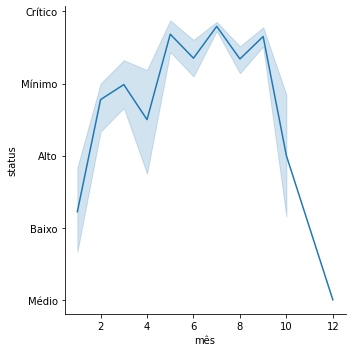

In [19]:
sn.relplot(data=dados_queimadas_bxd, x="mês", y="status", kind="line")

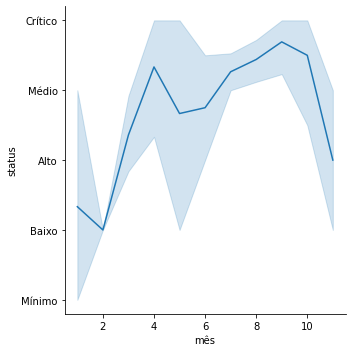

In [21]:
sn.relplot(data=dados_queimadas_RJ, x="mês", y="status", kind="line")

<AxesSubplot:xlabel='mês', ylabel='riscofogo'>

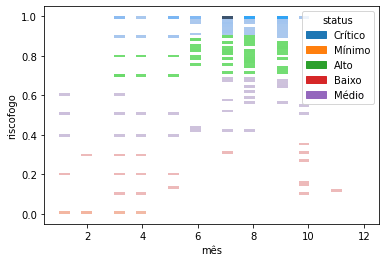

In [25]:
sn.histplot(dados_queimadas_bxd,x="mês", y ="riscofogo", hue = "status")

<AxesSubplot:xlabel='mês', ylabel='riscofogo'>

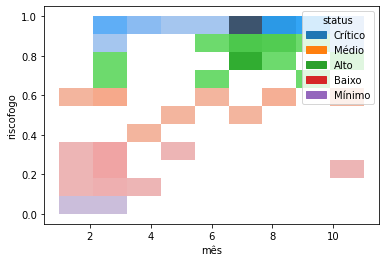

In [26]:
sn.histplot(dados_queimadas_RJ,x="mês", y ="riscofogo", hue = 'status')

<AxesSubplot:xlabel='status', ylabel='municipio'>

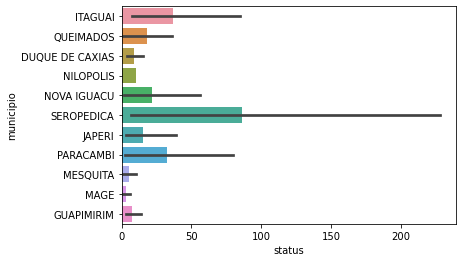

In [30]:
sn.barplot(data=indices_municipios_bxd, x="status", y="municipio")

In [ ]:
sn.barplot(data=dados_queimadas_RJ, x="mês", y="status")

In [ ]:
dados_queimadas_bxd.to_excel("indices_BXD.xlsx", index = False)

dados_queimadas_RJ.to_excel("indices_RJ.xlsx", index = False)

In [ ]:
#SERIE TEMPORAL 

serie = pd.Series(df["Status"], index=pd.date_range('1/1/2020', periods = 500))
serie = serie.cumsum()
serie.plot()

# Analise sobre os incidentes de enchentes 

In [ ]:
pasta = "C:\\Users\\wesle\\Documents\\dados"
dados = os.path.join(pasta, "notificacoes_alertas.zip")

with ZipFile(dados) as z:
    with z.open(f'notificacoes_alertas_tabela.csv') as f:
        dados_alerta = pd.read_csv(f, sep=';', error_bad_lines=False)

### Dados das precipitações do ano de 2022

In [ ]:
pasta_INMT = "C:\\Users\\wesle\\Documents\\"
dados_INMT = os.path.join(pasta_INMT, "dados_precipitacao_2022.zip")

with ZipFile(dados_INMT) as z:
    with z.open(f'dados_A603_D_2022-01-01_2022-07-31.csv') as f:
        dados_precipitacao = pd.read_csv(f, sep=';', error_bad_lines= False)

#### Tratamento dos dados 

In [ ]:
dados_limpos['Data'] = pd.to_datetime(dados_limpos['Data'], errors='coerce')

dados_limpos['Data do alerta'] = dados_limpos['Data'].dt.strftime('%d-%m-%Y')
dados_limpos['Hora do alerta'] = dados_limpos['Data'].dt.strftime('%H:%M:%S')

In [ ]:
dados_limpos['Data'] = pd.to_datetime(dados_limpos['Data do alerta'], errors='coerce')

In [ ]:
dados_precipitacao['Data'] = pd.to_datetime(dados_precipitacao['Data Medicao'], errors='coerce')
del(dados_precipitacao['Data Medicao'])

In [ ]:
dados_precipitacao.head()
dados_precipitacao = dados_precipitacao.rename(columns={'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)': 'Precipitação Total diaria(mm)'})

In [ ]:
Dias_mais_chuvosos_NI_2022['mes']= Dias_mais_chuvosos_NI_2022['Data'].dt.month

In [ ]:
Dias_mais_chuvosos_NI_2022 = pd.merge(dados_NI_2022_chuva_intensa,dados_precipitacao ,how = 'inner', on = 'Data')

#### Analise dos dados referente aos municipios 

In [ ]:
dados_NI_chuvasIntensas = dados_limpos.loc[(dados_limpos['UF'] == 'RJ') & (dados_limpos["Código IBGE"] == 3303500) & (dados_limpos["Tipo de Alerta"] == "CHUVAS INTENSAS")]

# Analise sobre a poluição do Ar 

In [ ]:
import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_seeg_emissoes',
table_id='brasil',
billing_project_id="<YOUR_PROJECT_ID>")

# Analise Qualidade das Aguas 

# Analise Qualidade dos Solos 